# Explainable Artificial Intelligence

In [1]:
import os
import sys
sys.path.append('/Users/damienmellot/desktop/MLE/Projects/fml/investor-risk-tolerance-modeling/')

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import src.settings.base as stg
from src.infrastructure.featureimportance import plot_feature_importance
from src.domain.processing import Processor
from src.application.RFRpredictor import fitted_RFRmodel

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
import eli5
from pdpbox import pdp, get_dataset, info_plots
from pycebox.ice import ice, ice_plot
import treeinterpreter
import shap

In [7]:
df = Processor().processed_data
Y = df[stg.TRUE_RISK_TOLERANCE]
X = df.loc[:, df.columns != stg.TRUE_RISK_TOLERANCE]
validation_size = stg.validation_size
seed = stg.seed
num_folds = stg.num_folds
scoring = stg.scoring
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [3]:
rfr = fitted_RFRmodel()

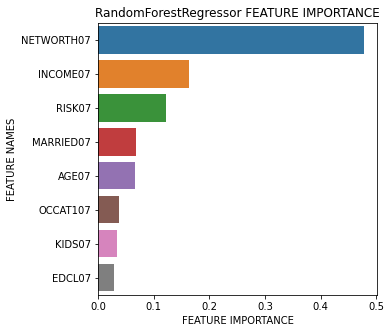

In [4]:
plot_feature_importance(rfr[1].feature_importances_,names=stg.COLS, model_type='RandomForestRegressor ')

In [6]:
eli5.show_weights(rfr)

In [11]:
f_predict = lambda x: rfr.predict(x)

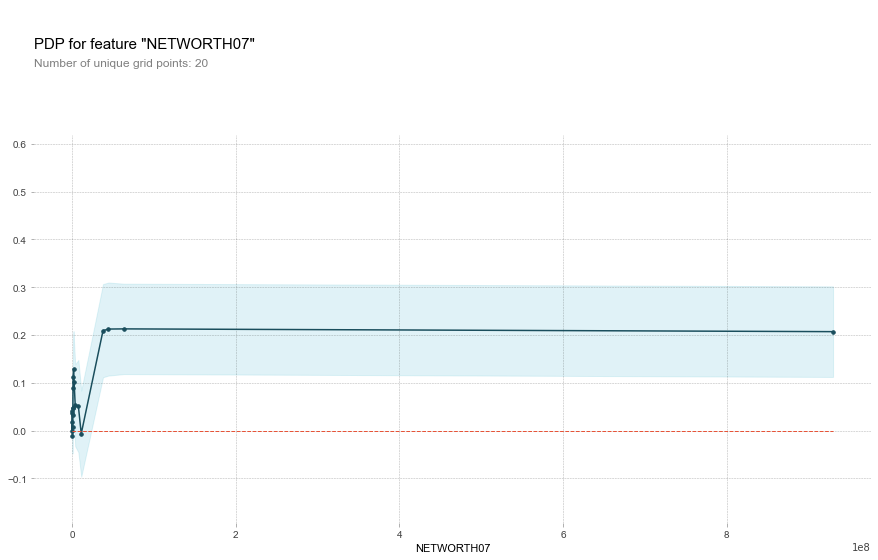

In [12]:
variable = stg.NETWORTH

pdp_goals = pdp.pdp_isolate(model=rfr,
                            dataset=X_test,
                            model_features=X_test.columns,
                            feature=variable,
                            num_grid_points=20,
                            grid_type='percentile', #possible values: 'equal' or 'percentile'
)

pdp.pdp_plot(pdp_goals, variable, center=True) # center arg center plots and compare each value to the first one
plt.show()

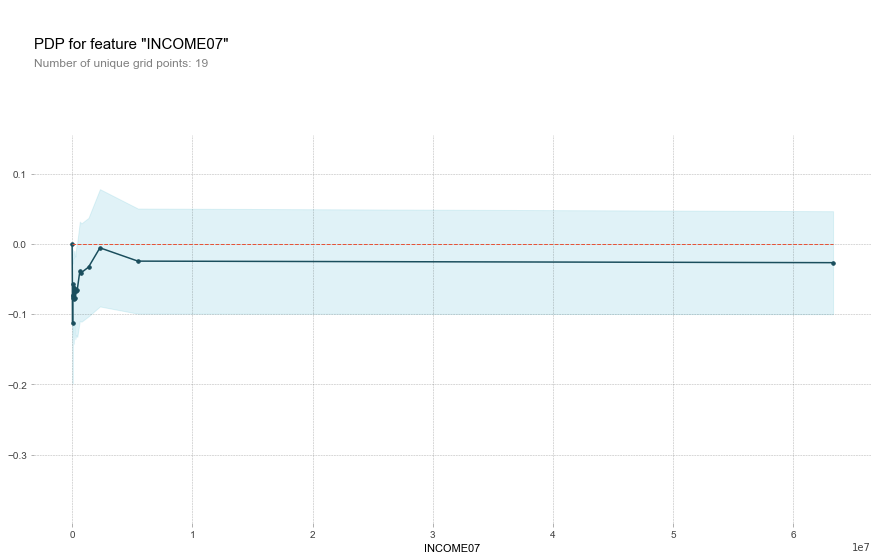

In [13]:
variable = stg.INCOME

pdp_goals = pdp.pdp_isolate(model=rfr,
                            dataset=X_test,
                            model_features=X_test.columns,
                            feature=variable,
                            num_grid_points=20,
                            grid_type='percentile', #possible values: 'equal' or 'percentile'
)

pdp.pdp_plot(pdp_goals, variable, center=True) # center arg center plots and compare each value to the first one
plt.show()

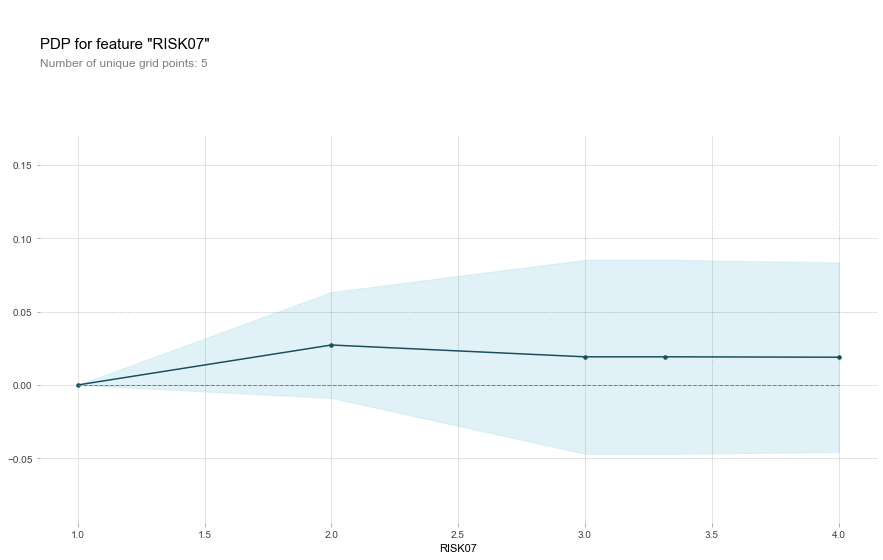

In [14]:
variable = stg.RISK_WILLINGNESS

pdp_goals = pdp.pdp_isolate(model=rfr,
                            dataset=X_test,
                            model_features=X_test.columns,
                            feature=variable,
                            num_grid_points=20,
                            grid_type='percentile', #possible values: 'equal' or 'percentile'
)

pdp.pdp_plot(pdp_goals, variable, center=True) # center arg center plots and compare each value to the first one
plt.show()

Text(0.5, 1.0, 'ICE Curves')

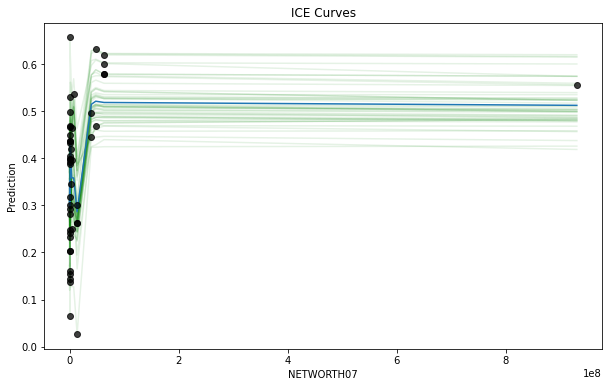

In [16]:
X_ref = X_test.copy().sample(50)
variable = stg.NETWORTH 

ice_df = ice(X_ref, variable, f_predict, num_grid_points=20)

fig, ax_ice = plt.subplots(nrows=1, ncols=1,figsize=(10, 6))

ice_plot(ice_df, plot_points=True, point_kwargs={'color': 'k', 'alpha': 0.75}, c='g',
         alpha=0.1, plot_pdp=True, ax=ax_ice)

ax_ice.set_xlabel(variable)
ax_ice.set_ylabel('Prediction') 
ax_ice.set_title('ICE Curves')

Text(0.5, 1.0, 'ICE Curves')

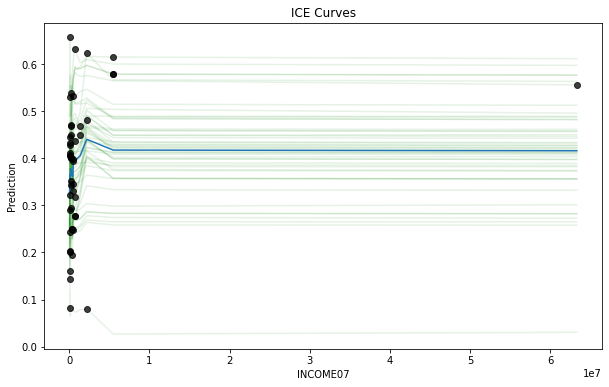

In [17]:
X_ref = X_test.copy().sample(50)
variable = stg.INCOME 

ice_df = ice(X_ref, variable, f_predict, num_grid_points=20)

fig, ax_ice = plt.subplots(nrows=1, ncols=1,figsize=(10, 6))

ice_plot(ice_df, plot_points=True, point_kwargs={'color': 'k', 'alpha': 0.75}, c='g',
         alpha=0.1, plot_pdp=True, ax=ax_ice)

ax_ice.set_xlabel(variable)
ax_ice.set_ylabel('Prediction') 
ax_ice.set_title('ICE Curves')

Text(0.5, 1.0, 'ICE Curves')

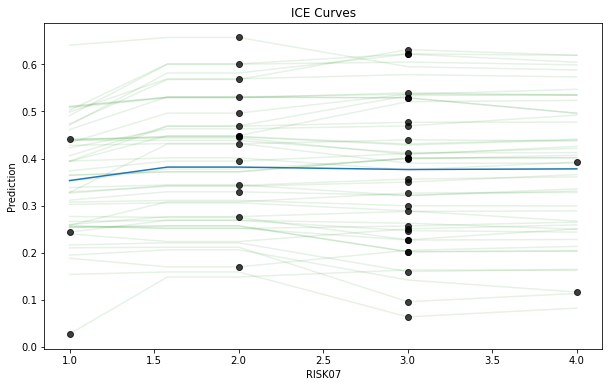

In [18]:
X_ref = X_test.copy().sample(50)
variable = stg.RISK_WILLINGNESS 

ice_df = ice(X_ref, variable, f_predict, num_grid_points=20)

fig, ax_ice = plt.subplots(nrows=1, ncols=1,figsize=(10, 6))

ice_plot(ice_df, plot_points=True, point_kwargs={'color': 'k', 'alpha': 0.75}, c='g',
         alpha=0.1, plot_pdp=True, ax=ax_ice)

ax_ice.set_xlabel(variable)
ax_ice.set_ylabel('Prediction') 
ax_ice.set_title('ICE Curves')

In [28]:
shap.initjs()
X_train_small = X_train.copy().sample(200)

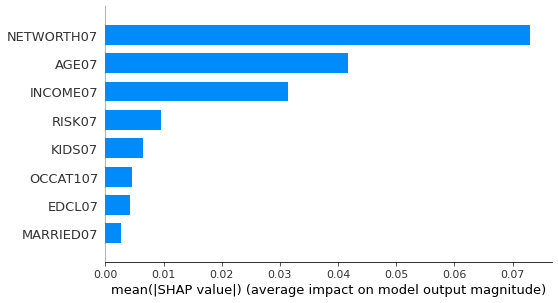

In [29]:
shap_values = shap.TreeExplainer(rfr).shap_values(X_train_small)
shap.summary_plot(shap_values, X_train_small, plot_type="bar")

In [30]:
X_ref_shap = X_test.copy()

In [31]:
%%time
explanation = shap.TreeExplainer(rfr)
shap_values = explanation.shap_values(X_ref_shap)
df_contrib = pd.DataFrame(shap_values, columns=X_ref_shap.columns, index=X_ref_shap.index)
bias = explanation.expected_value

CPU times: user 457 ms, sys: 2.13 ms, total: 460 ms
Wall time: 459 ms


In [32]:
index = 2
shap.force_plot(explanation.expected_value, shap_values[index, :], X_ref_shap.iloc[index, :])

In [33]:
shap.force_plot(explanation.expected_value, shap_values, X_ref_shap)

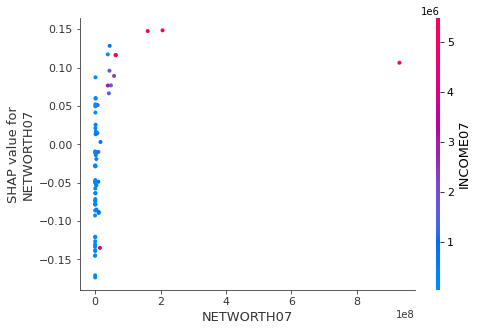

In [34]:
shap.dependence_plot(stg.NETWORTH, shap_values, X_ref_shap)

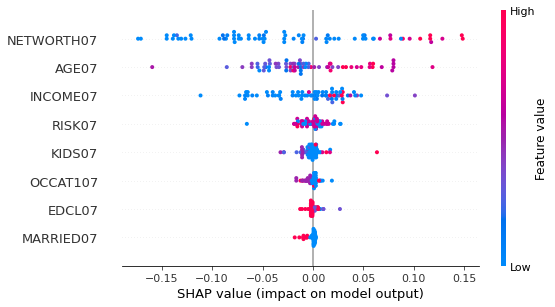

In [35]:
shap.summary_plot(shap_values, X_ref_shap, plot_type="dot")